In [1]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

class Gaussian2D:
    def __init__(self,sigma_x = 1.0, sigma_y = 1.0, cov_xy = 0.0,mu_x = 0.0, mu_y = 0.0):
        self.cov = np.array([[sigma_x,cov_xy],[cov_xy,sigma_y]])
        self.mean = np.array([mu_x,mu_y]).T
        
    def shift(self,delta,angle):
        ca = math.cos(angle)
        sa = math.sin(angle)
        rot = np.array([[ca,-sa],[sa,ca]])
        
        self.cov = rot.dot(self.cov).dot(rot.T)
        self.mean = self.mean + delta
        
    def value(self, pos):
        delta = pos - self.mean
        numerator = math.exp(-0.5 * (delta.T).dot(self.cov.I).dot(delta))
        denominator = 2 * math.pi * math.sqrt(np.linalg.det(self.cov))
        return numerator / denominator
    
    def ellipse(self):
        eig_vals,eig_vec = np.linalg.eig(self.cov)

        v1 = eig_vals[0] * eig_vec[:,0]
        v2 = eig_vals[1] * eig_vec[:,1]
        v1_direction = math.atan2(v1[1],v1[0])
        
        e = Ellipse(self.mean,width=np.linalg.norm(v1),height=np.linalg.norm(v2),angle=v1_direction/3.14*180)
        e.set_alpha(0.2)
        
        return e



In [2]:
p = Gaussian2D(1.0,0.5,0.0)
print(p.cov)
p.shift(np.array([1,1]).T,3.14/4)
print(p.cov)
print(p.mean)

[[ 1.   0. ]
 [ 0.   0.5]]
[[ 0.75019908  0.24999992]
 [ 0.24999992  0.74980092]]
[ 1.  1.]


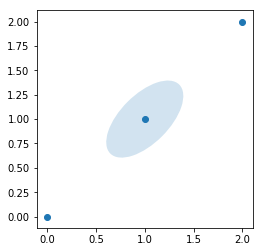

In [3]:
fig = plt.figure(0)
sp = fig.add_subplot(111, aspect='equal')

plt.scatter([0,1,2],[0,1,2])
sp.add_artist(p.ellipse())

plt.show()